#Estudo de classificação de texto com modelos KNN e de Regressão Logística com dataset fornecido via API do Reddit.

Para testar esse código é necessário ter uma conta no reddit, client-id e secret-key.


instalando bibliotecas necessárias

In [ ]:
!pip install praw config seaborn matplotlib numpy scikit-learn regex

importando as bibliotecas

In [ ]:
import re
import praw
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

definição de assuntos que será feito web-scraping via api oficial do reddit.

In [ ]:
assuntos = ['agricultura', 'machinelearning', 'drones']

Criando função principal para coleta dos dados.

In [ ]:
def carrega_dados():
   #adicione seus dados aqui
    api_reddit = praw.Reddit(client_id = "x",
    	                     client_secret = "x",
                             password = "x",
                             user_agent = "x",
                             username = "x")


    char_count = lambda post: len(re.sub('\W|\d', '', post.selftext))

    #Condição para filtrar os posts
    mask = lambda post: char_count(post) >= 100

    #Listas para os resultados
    data = []
    labels = []

    for i, assunto in enumerate(assuntos):

        #Extrai os posts
        subreddit_data = api_reddit.subreddit(assunto).new(limit = 1000)

        #Filtra os posts
        posts = [post.selftext for post in filter(mask, subreddit_data)]

        #Adiciona posts e labels às listas
        data.extend(posts)
        labels.extend([i] * len(posts))

        print(f"Número de posts do assunto r/{assunto}: {len(posts)}",
              f"\nUm dos posts extraídos: {posts[0][:600]}...\n",
              "_" * 80 + '\n')

    return data, labels

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-2874944336.py:8: SyntaxWarning: invalid escape sequence '\W'
  char_count = lambda post: len(re.sub('\W|\d', '', post.selftext))


Variáveis de controle

In [ ]:
TEST_SIZE = .2
RANDOM_STATE = 0

Split dos dados

In [ ]:
def split_data():

    print(f"Split {100 * TEST_SIZE}% dos dados para teste e avaliação do modelo...")

    X_treino, X_teste, y_treino, y_teste = train_test_split(data,
                                                            labels,
                                                            test_size = TEST_SIZE,
                                                            random_state = RANDOM_STATE)

    print(f"{len(y_teste)} amostras de teste.")

    return X_treino, X_teste, y_treino, y_teste

Variáveis de controle

In [ ]:
MIN_DOC_FREQ = 1
N_COMPONENTS = 1000
N_ITER = 30

pipeline de pré-processamento

In [ ]:
def preprocessing_pipeline():

    # Regex para remover caracteres nao desejaveis, não 'alfabeticos"
    pattern = r'\W|\d|http.*\s+|www.*\s+'
    preprocessor = lambda text: re.sub(pattern, ' ', text)

    #Vetorização TF-IDF
    vectorizer = TfidfVectorizer(preprocessor = preprocessor, stop_words = 'english', min_df = MIN_DOC_FREQ)

    #Reduzindo a dimensionalidade da matriz TF-IDF
    decomposition = TruncatedSVD(n_components = N_COMPONENTS, n_iter = N_ITER)

    pipeline = [('tfidf', vectorizer), ('svd', decomposition)]

    return pipeline

Variáveis de controle

In [ ]:
N_NEIGHBORS = 4
CV = 3

Finalmente, criando os modelos

In [ ]:
def cria_modelos():

    modelo_1 = KNeighborsClassifier(n_neighbors = N_NEIGHBORS)
    modelo_2 = LogisticRegressionCV(cv = CV, random_state = RANDOM_STATE)

    modelos = [("KNN", modelo_1), ("LogReg", modelo_2)]

    return modelos


Treinando e avaliando os modelos

In [ ]:
def treina_avalia(modelos, pipeline, X_treino, X_teste, y_treino, y_teste):

    resultados = []

    for name, modelo in modelos:

        pipe = Pipeline(pipeline + [(name, modelo)])

        #Treino
        print(f"Treinando o modelo {name} com dados de treino...")
        pipe.fit(X_treino, y_treino)

        #Previsões com dados de teste
        y_pred = pipe.predict(X_teste)

        #Calcula as metrics
        report = classification_report(y_teste, y_pred)
        print("Relatório de Classificação\n", report)

        resultados.append([modelo, {'modelo': name, 'previsoes': y_pred, 'report': report,}])

    return resultados

Pipeline

In [ ]:
if __name__ == "__main__":

    data, labels = carrega_dados()

    X_treino, X_teste, y_treino, y_teste = split_data()

    pipeline = preprocessing_pipeline()

    all_models = cria_modelos()

    resultados = treina_avalia(all_models, pipeline, X_treino, X_teste, y_treino, y_teste)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Número de posts do assunto r/agricultura: 29 
Um dos posts extraídos: Si te interesa la agricultura sencilla, huertos caseros o simplemente ver cómo crecen las matas de plátano desde la semilla, te invito a echarle un vistazo a mi canal. Siempre estoy abierto a consejos, críticas y nuevas ideas. 🙌...
 ________________________________________________________________________________



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Número de posts do assunto r/machinelearning: 767 
Um dos posts extraídos: Hi All

I’m preparing to submit to arXiv in Experimentation. Since this is my first submission, I need an endorsement.

The draft is ready and I can share it upon request. Thanks! 
...
 ________________________________________________________________________________



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Número de posts do assunto r/drones: 665 
Um dos posts extraídos: Hey everyone,

New to this group as well as new to drones! 

I’ve noticed the DJI Mini 4 Pro seems to be sold out almost everywhere in the US. DJI’s own store shows it as out of stock, and Amazon only has bundles at crazy prices.

What would be the best place to get one for a fair price?

Appreciate any insight!
...
 ________________________________________________________________________________

Split 20.0% dos dados para teste e avaliação do modelo...
293 amostras de teste.
Treinando o modelo KNN com dados de treino...
Relatório de Classificação
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.92      0.97      0.94       150
           2       0.95      0.90      0.92       134

    accuracy                           0.93       293
   macro avg       0.89      0.92      0.90       293
weighted avg       0.93      0.93      0.93       29

Visualizando resultados

In [ ]:
def plot_distribution():
    _, counts = np.unique(labels, return_counts = True)
    sns.set_theme(style = "whitegrid")
    plt.figure(figsize = (15, 6), dpi = 120)
    plt.title("Número de posts por Assunto")
    sns.barplot(x = assuntos, y = counts)
    plt.legend([' '.join([f.title(),f"- {c} posts"]) for f,c in zip(assuntos, counts)])
    plt.show()

In [ ]:
def plot_confusion(result):
    print("Relatório de classificação\n", result[-1]['report'])
    y_pred = result[-1]['previsoes']
    conf_matrix = confusion_matrix(y_teste, y_pred)
    _, test_counts = np.unique(y_teste, return_counts = True)
    conf_matrix_percent = conf_matrix / test_counts.transpose() * 100
    plt.figure(figsize = (9,8), dpi = 120)
    plt.title(result[-1]['modelo'].upper() + " Resultados")
    plt.xlabel("Valor Real")
    plt.ylabel("Previsão do modelo")
    ticklabels = [f"r/{sub}" for sub in assuntos]
    sns.heatmap(data = conf_matrix_percent, xticklabels = ticklabels, yticklabels = ticklabels, annot = True, fmt = '.2f')
    plt.show()

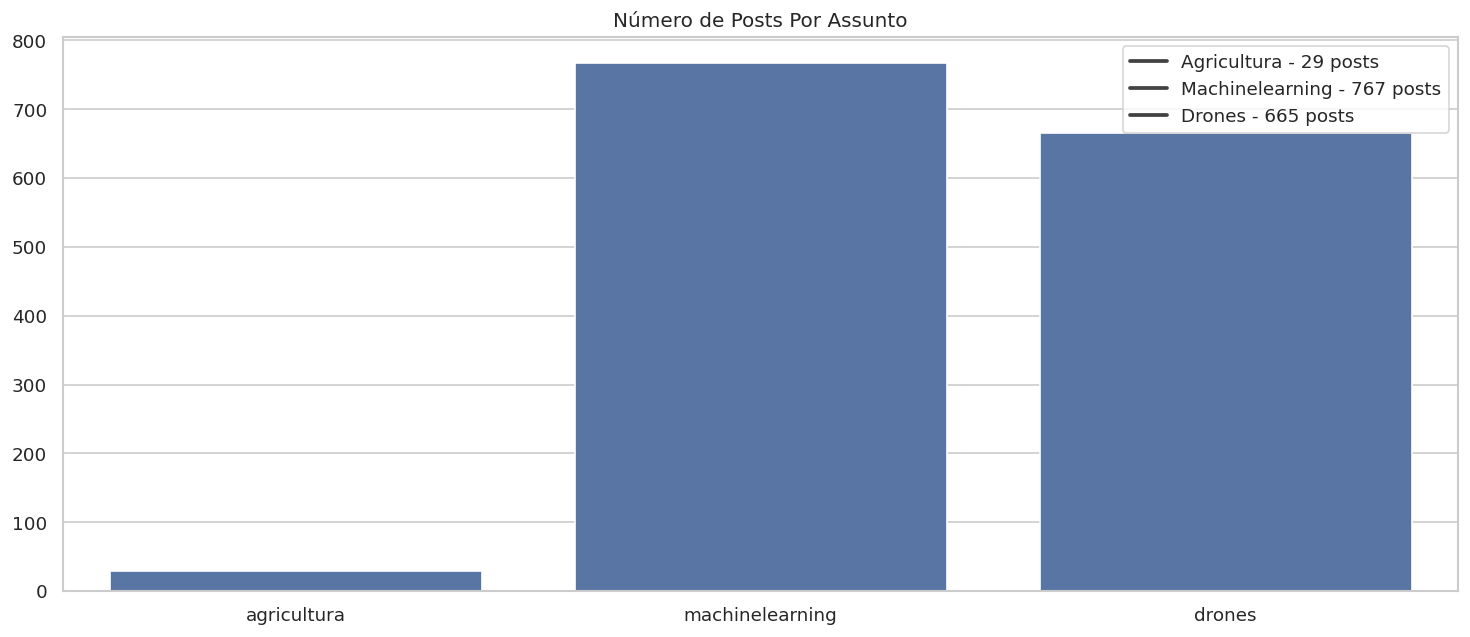

Relatório de Classificação
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.92      0.97      0.94       150
           2       0.95      0.90      0.92       134

    accuracy                           0.93       293
   macro avg       0.89      0.92      0.90       293
weighted avg       0.93      0.93      0.93       293



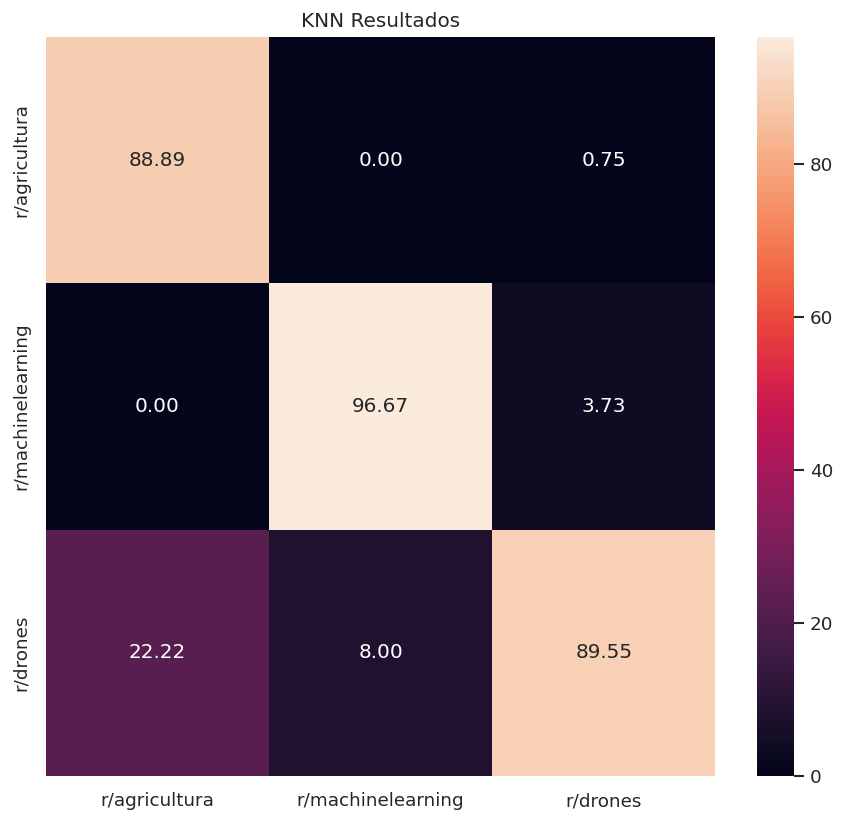

Relatório de Classificação
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.96      1.00      0.98       150
           2       0.99      0.97      0.98       134

    accuracy                           0.98       293
   macro avg       0.98      0.88      0.92       293
weighted avg       0.98      0.98      0.98       293



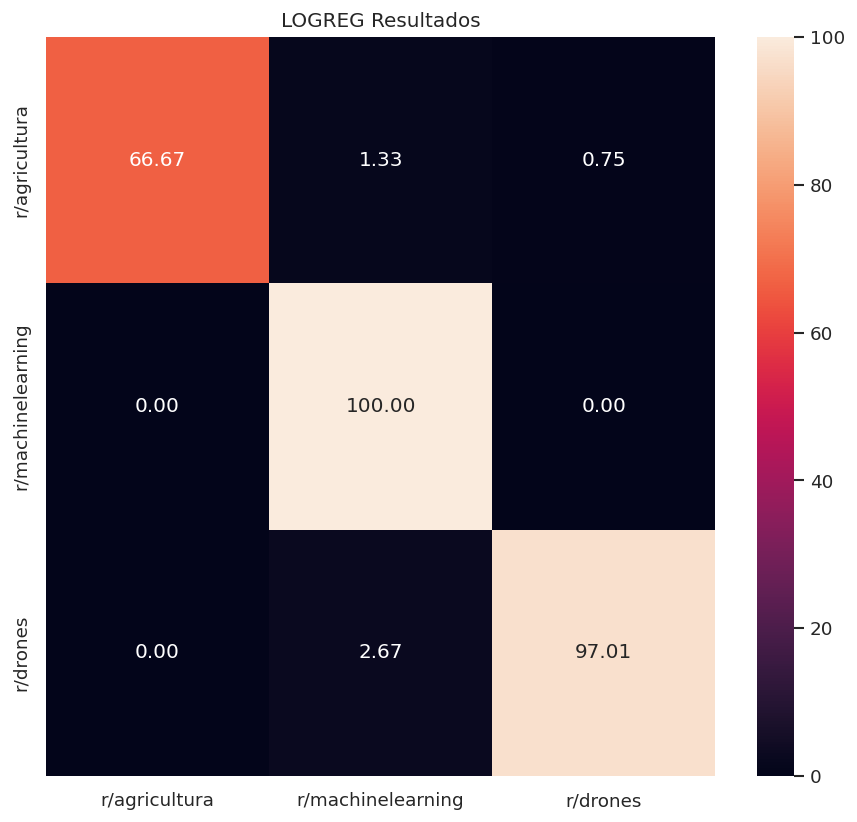

In [ ]:
plot_distribution()

#Resultado do KNN
plot_confusion(resultados[0])

#Resultado da Regressão Logística
plot_confusion(resultados[1])